# Students Dropout Prediction

## Data Analysis

In [7399]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [7400]:
# Import dataset

df = pd.read_csv("./Dataset/data.csv", sep=";")

In [7401]:
# Check dataset shape

df.shape

(4424, 37)

In [7402]:
# Print first 5 rows

df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [7403]:
# Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7404]:
# Descriptive Statistics 

df.describe().transpose()

count         mean  \
Marital status                                  4424.0     1.178571   
Application mode                                4424.0    18.669078   
Application order                               4424.0     1.727848   
Course                                          4424.0  8856.642631   
Daytime/evening attendance\t                    4424.0     0.890823   
Previous qualification                          4424.0     4.577758   
Previous qualification (grade)                  4424.0   132.613314   
Nacionality                                     4424.0     1.873192   
Mother's qualification                          4424.0    19.561935   
Father's qualification                          4424.0    22.275316   
Mother's occupation                             4424.0    10.960895   
Father's occupation                             4424.0    11.032324   
Admission grade                                 4424.0   126.978119   
Displaced                                       4424.0     0.548373   
Educational special needs                       4424.0     0.011528   
Debtor                                          4424.0     0.113698   
Tuition fees up to date                         4424.0     0.880651   
Gender                                          4424.0     0.351718   
Scholarship holder                              4424.0     0.248418   
Age at enrollment                               4424.0    23.265145   
International                                   4424.0     0.024864   
Curricular units 1st sem (credited)             4424.0     0.709991   
Curricular units 1st sem (enrolled)             4424.0     6.270570   
Curricular units 1st sem (evaluations)          4424.0     8.299051   
Curricular units 1st sem (approved)             4424.0     4.706600   
Curricular units 1st sem (grade)                4424.0    10.640822   
Curricular units 1st sem (without evaluations)  4424.0     0.137658   
Curricular units 2nd sem (credited)             4424.0     0.541817   
Curricular units 2nd sem (enrolled)             4424.0     6.232143   
Curricular units 2nd sem (evaluations)          4424.0     8.063291   
Curricular units 2nd sem (approved)             4424.0     4.435805   
Curricular units 2nd sem (grade)                4424.0    10.230206   
Curricular units 2nd sem (without evaluations)  4424.0     0.150316   
Unemployment rate                               4424.0    11.566139   
Inflation rate                                  4424.0     1.228029   
GDP                                             4424.0     0.001969   

                                                        std    min      25%  \
Marital status                                     0.605747   1.00     1.00   
Application mode                                  17.484682   1.00     1.00   
Application order                                  1.313793   0.00     1.00   
Course                                          2063.566416  33.00  9085.00   
Daytime/evening attendance\t                       0.311897   0.00     1.00   
Previous qualification                            10.216592   1.00     1.00   
Previous qualification (grade)                    13.188332  95.00   125.00   
Nacionality                                        6.914514   1.00     1.00   
Mother's qualification                            15.603186   1.00     2.00   
Father's qualification                            15.343108   1.00     3.00   
Mother's occupation                               26.418253   0.00     4.00   
Father's occupation                               25.263040   0.00     4.00   
Admission grade                                   14.482001  95.00   117.90   
Displaced                                          0.497711   0.00     0.00   
Educational special needs                          0.106760   0.00     0.00   
Debtor                                             0.317480   0.00     0.00   
Tuition fees up to date                            0.324235   0.00     1.00   

In [7405]:
# Check  missing values

df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

From this it is clear that there are no null values in the dataset. 

In [7406]:
# Columns in the dataset

print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [7407]:
# Remove single quotation and tab character from column names

df.columns.str.strip()
df.columns = df.columns.str.replace("'", "").str.replace("\t", "")

In [7408]:
# Rename all the columns with underscore

df.rename(columns = {
    'Marital status': 'marital_status',
    'Application mode': 'application_mode',
    'Application order': 'application_order',
    'Course': 'course',
    'Daytime/evening attendance': 'daytime_evening_attendance',
    'Previous qualification': 'previous_qualification',
    'Previous qualification (grade)': 'previous_qualification_grade',
    'Nacionality': 'nacionality',
    'Mothers qualification': 'mothers_qualification',
    'Fathers qualification': 'fathers_qualification',
    'Mothers occupation': 'mothers_occupation',
    'Fathers occupation': 'fathers_occupation',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'educational_special_needs',
    'Debtor': 'debtor',
    'Tuition fees up to date': 'tuition_fees_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship_holder',
    'Age at enrollment': 'age_at_enrollment',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'curricular_units_1st_sem_credited',
    'Curricular units 1st sem (enrolled)': 'curricular_units_1st_sem_enrolled',
    'Curricular units 1st sem (evaluations)': 'curricular_units_1st_sem_evaluations',
    'Curricular units 1st sem (approved)': 'curricular_units_1st_sem_approved',
    'Curricular units 1st sem (grade)': 'curricular_units_1st_sem_grade',
    'Curricular units 1st sem (without evaluations)': 'curricular_units_1st_sem_without_evaluations',
    'Curricular units 2nd sem (credited)': 'curricular_units_2nd_sem_credited',
    'Curricular units 2nd sem (enrolled)': 'curricular_units_2nd_sem_enrolled',
    'Curricular units 2nd sem (evaluations)': 'curricular_units_2nd_sem_evaluations',
    'Curricular units 2nd sem (approved)': 'curricular_units_2nd_sem_approved',
    'Curricular units 2nd sem (grade)': 'curricular_units_2nd_sem_grade',
    'Curricular units 2nd sem (without evaluations)': 'curricular_units_2nd_sem_without_evaluations',
    'Unemployment rate': 'unemployment_rate',
    'Inflation rate': 'inflation_rate',
    'GDP': 'gdp',
    'Target': 'target'
}, inplace=True)


In [7409]:
# Define categorical and numerical columns

categorical_columns = ['marital_status','application_mode', 'application_order', 'course', 'daytime_evening_attendance','previous_qualification','nacionality',
                       'mothers_qualification','fathers_occupation', 'displaced', 'educational_special_needs','debtor','tuition_fees_up_to_date','gender','scholarship_holder','international']




numerical_columns = ['previous_qualification_grade','admission_grade', 'age_at_enrollment','curricular_units_1st_sem_credited','curricular_units_1st_sem_enrolled',
                     'curricular_units_1st_sem_evaluations','curricular_units_1st_sem_approved','curricular_units_1st_sem_grade','curricular_units_1st_sem_without_evaluations',
                     'curricular_units_2nd_sem_credited','curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations','curricular_units_2nd_sem_approved',
                     'curricular_units_2nd_sem_grade', 'curricular_units_2nd_sem_without_evaluations','unemployment_rate','inflation_rate', 'gdp' ]

In [7410]:
# Transform datatype to object

for col in categorical_columns:
  df[col] = df[col].astype('object')

In [7411]:
# Check for duplicates

df.duplicated().sum()

0

In [7412]:
# Count unique values in Categorical columns

for col in categorical_columns:
  print(col + "---" + str(df[col].nunique()))

marital_status---6
application_mode---18
application_order---8
course---17
daytime_evening_attendance---2
previous_qualification---17
nacionality---21
mothers_qualification---29
fathers_occupation---46
displaced---2
educational_special_needs---2
debtor---2
tuition_fees_up_to_date---2
gender---2
scholarship_holder---2
international---2


In [7413]:
# Verify target unique values

df['target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

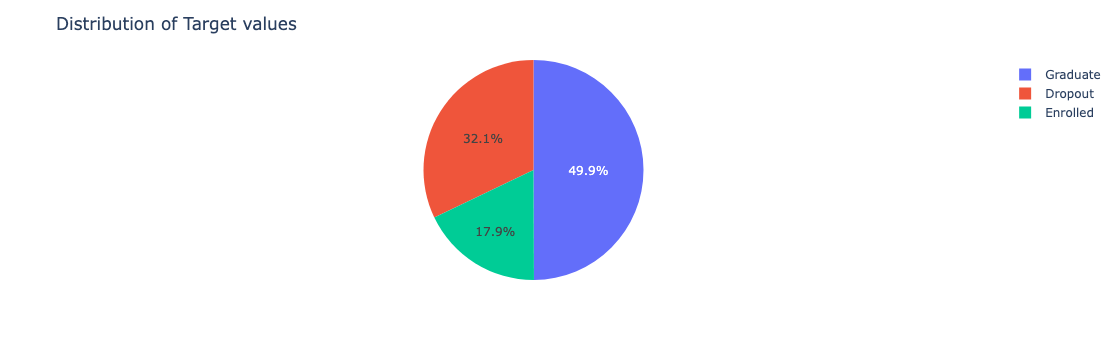

In [7414]:
# Distribution of target values

target_value_counts = df['target'].value_counts()

distribution = px.pie(values= target_value_counts,
             names= target_value_counts.index.to_list())

distribution.update_layout(title="Distribution of Target values")
distribution.show()

In [7415]:
# Drop 'Enrolled' status

df = df[df.target != 'Enrolled']

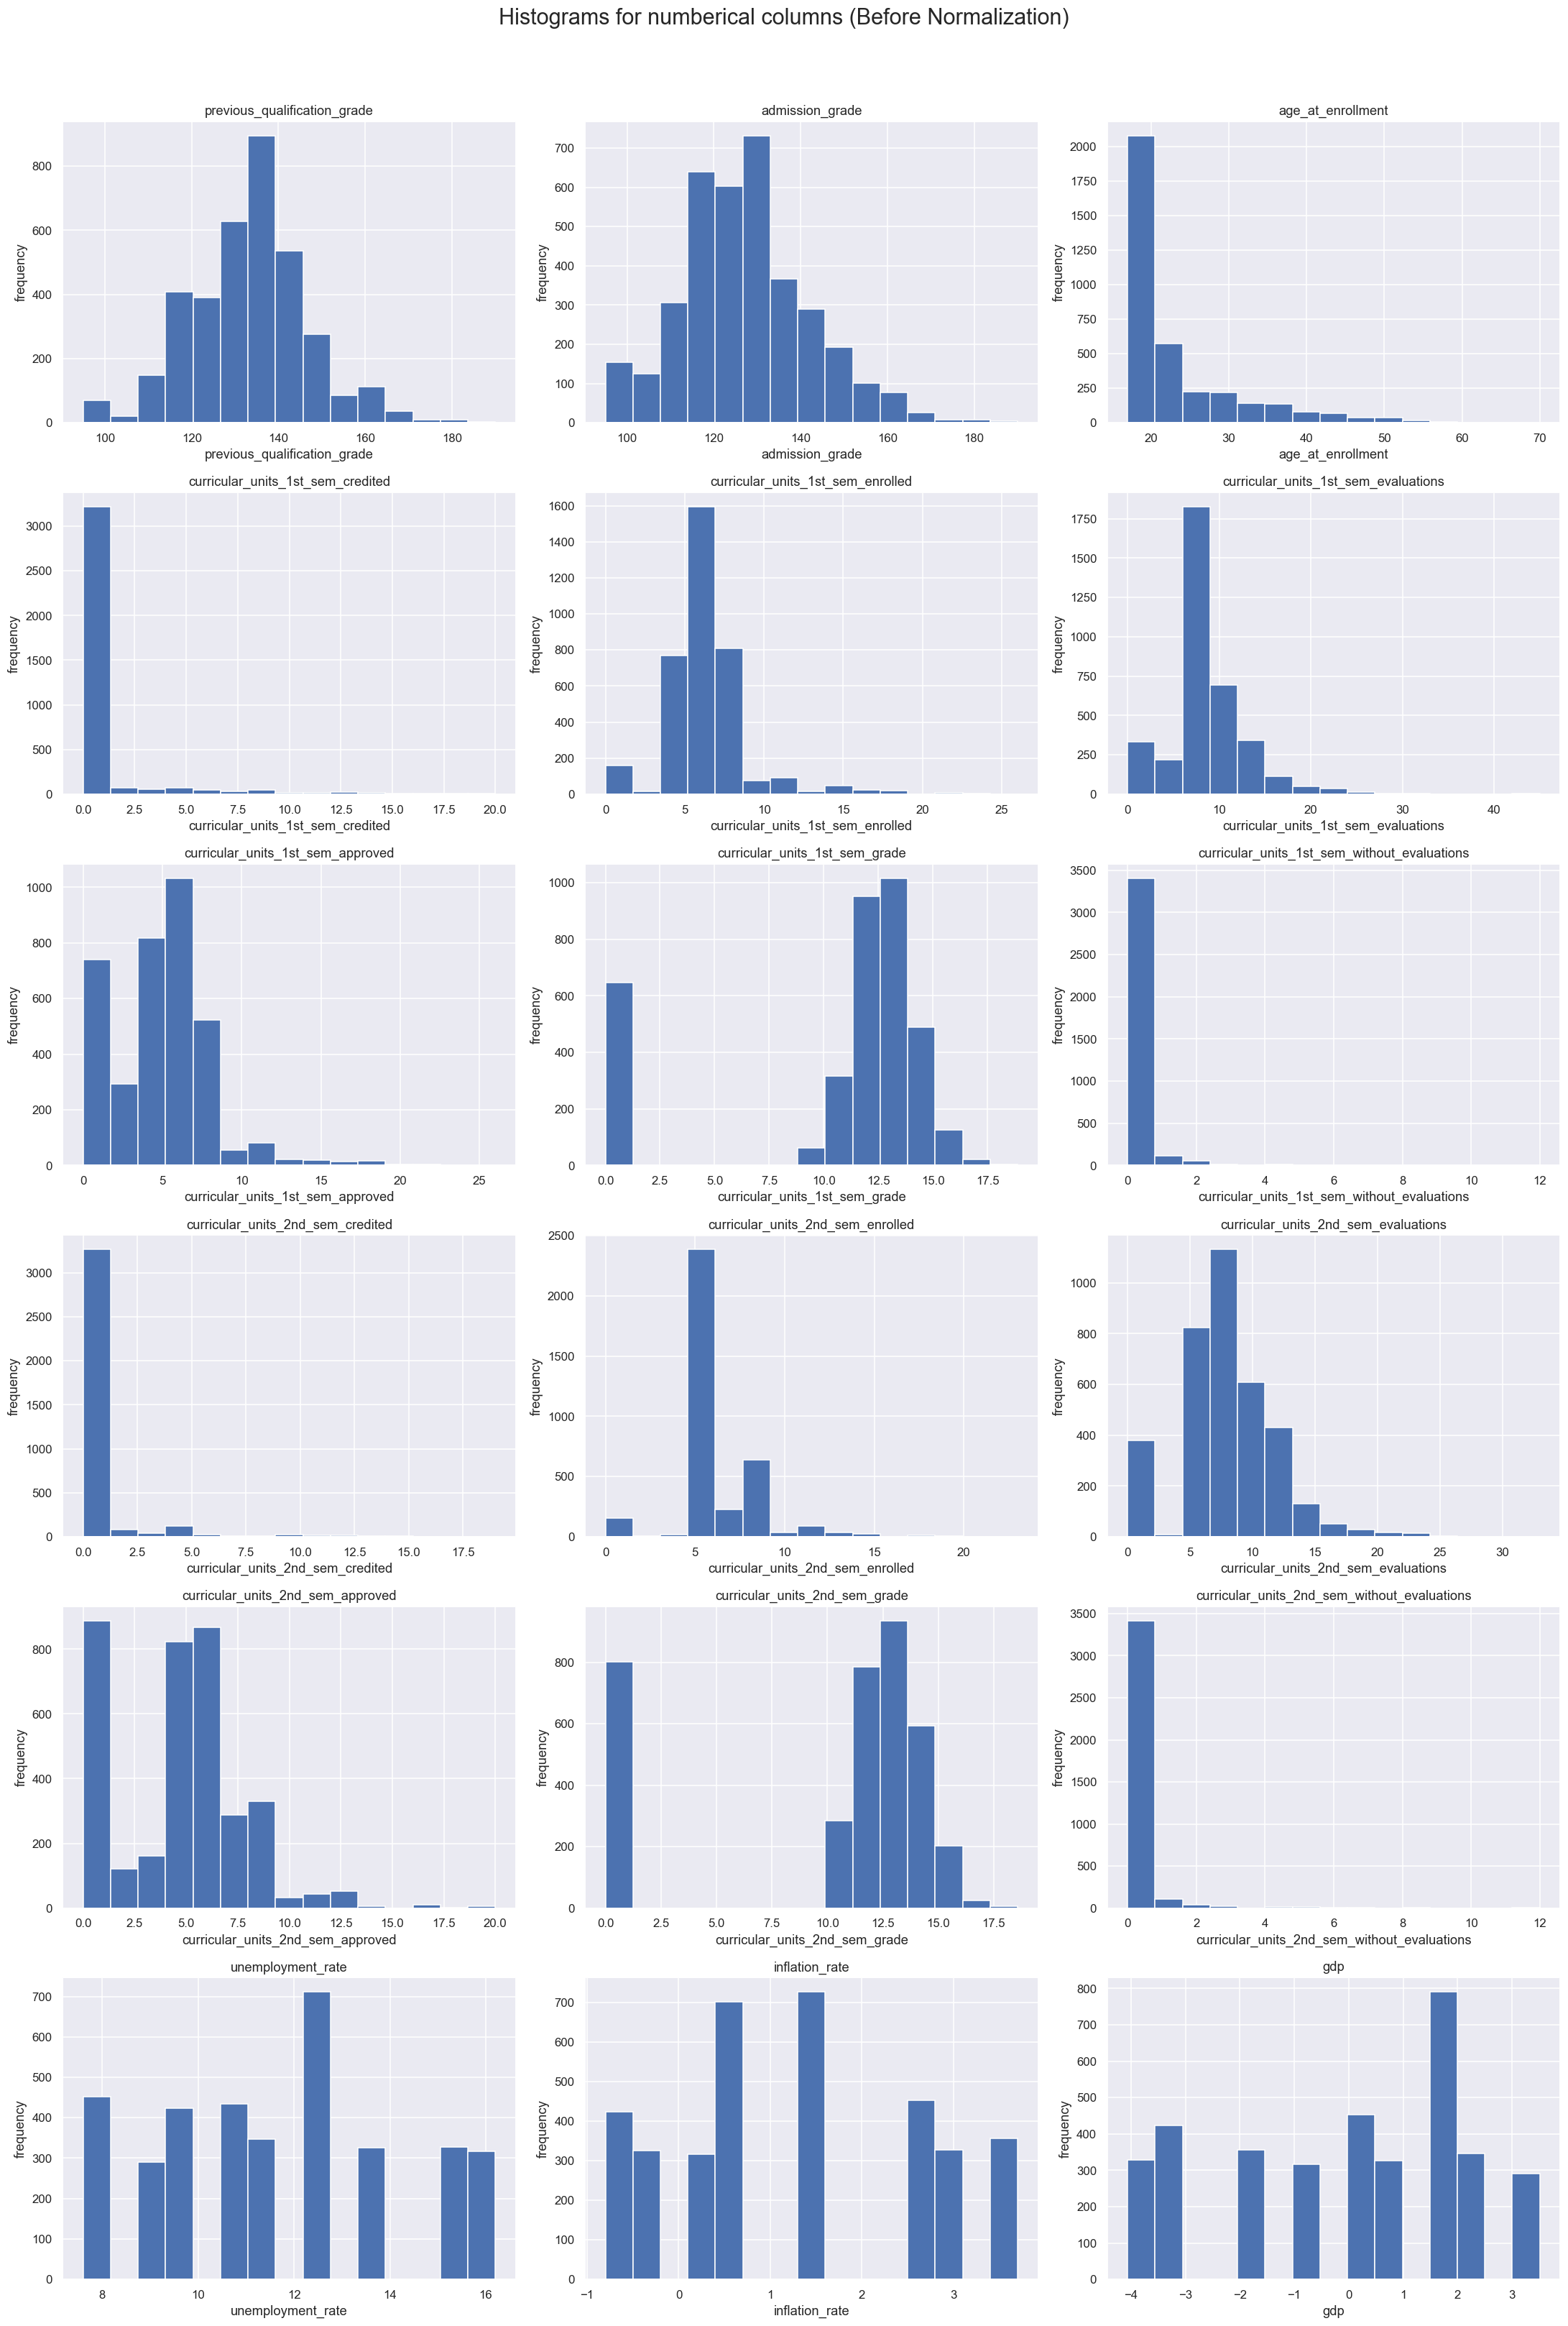

In [7416]:
# Visualize distribution of numberical columns

fig, axes = plt.subplots(6, 3, figsize=(20, 30))
fig.suptitle(
    "Histograms for numberical columns (Before Normalization)", fontsize=20)


axes = axes.flatten()


for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=15)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("frequency")


plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

In [7417]:
# Define key value pair to understand data relations

data_copy = df.copy()
for col in categorical_columns:
    if col == 'marital_status':
      data_copy[col] = data_copy[col].map({1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated'})
    elif col == 'gender':
      data_copy[col] = data_copy[col].map({1: 'male', 0: 'female'})
    elif col == 'scholarship_holder':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col == 'tuition_fees_up_to_date':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col == 'debtor':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col == 'tuition_fees_up_to_date':
      data_copy[col] = data_copy[col].map({1: 'yes', 0: 'no'})
    elif col =='nacionality':
      data_copy[col] = data_copy[col].map({1 :'Portuguese', 2 : 'German', 6 : 'Spanish', 11 : 'Italian', 13 : 'Dutch', 14 : 'English', 17 : 'Lithuanian', 21 : 'Angolan', 22 : 'Cape Verdean', 24 : 'Guinean', 25 : 'Mozambican', 26 : 'Santomean', 32 : 'Turkish', 41 : 'Brazilian', 62 : 'Romanian', 100 : 'Moldova (Republic of)', 101 : 'Mexican', 103 : 'Ukrainian', 105 : 'Russian', 108 : 'Cuban', 109 : 'Colombian'})
    elif col == 'course':
       data_copy[col]= data_copy[col].map({33: 'Biofuel Production Technologies', 171:'Animation and Multimedia Design', 8014:  'Social Service (evening attendance)', 9003: 'Agronomy', 9070 : 'Communication Design', 9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130 : 'Equinculture', 9147 : 'Management', 9238 : 'Social Service', 9254 : 'Tourism', 9500: 'Nursing', 9556 : 'Oral Hygiene', 9670 : 'Advertising and Marketing Management', 9773 : 'Journalism and Communication', 9853 : 'Basic Education', 9991 : 'Management (evening attendance)'})

### Analyse students relation

In [7418]:
# Check how many students of the dataset are international and non international

data_copy['international'].value_counts()

international
0    3544
1      86
Name: count, dtype: int64

In [7419]:
# Check predominance nacionality of students

data_copy.groupby('international')['nacionality'].value_counts()

international  nacionality          
0              Portuguese               3544
1              Brazilian                  32
               Cape Verdean               12
               Santomean                   9
               Spanish                     8
               Guinean                     5
               Italian                     3
               Ukrainian                   3
               German                      2
               Mexican                     2
               Moldova (Republic of)       2
               Angolan                     1
               Colombian                   1
               Dutch                       1
               English                     1
               Lithuanian                  1
               Mozambican                  1
               Romanian                    1
               Russian                     1
Name: count, dtype: int64

Text(0.5, 0, 'Tuition Fees Up to Date')

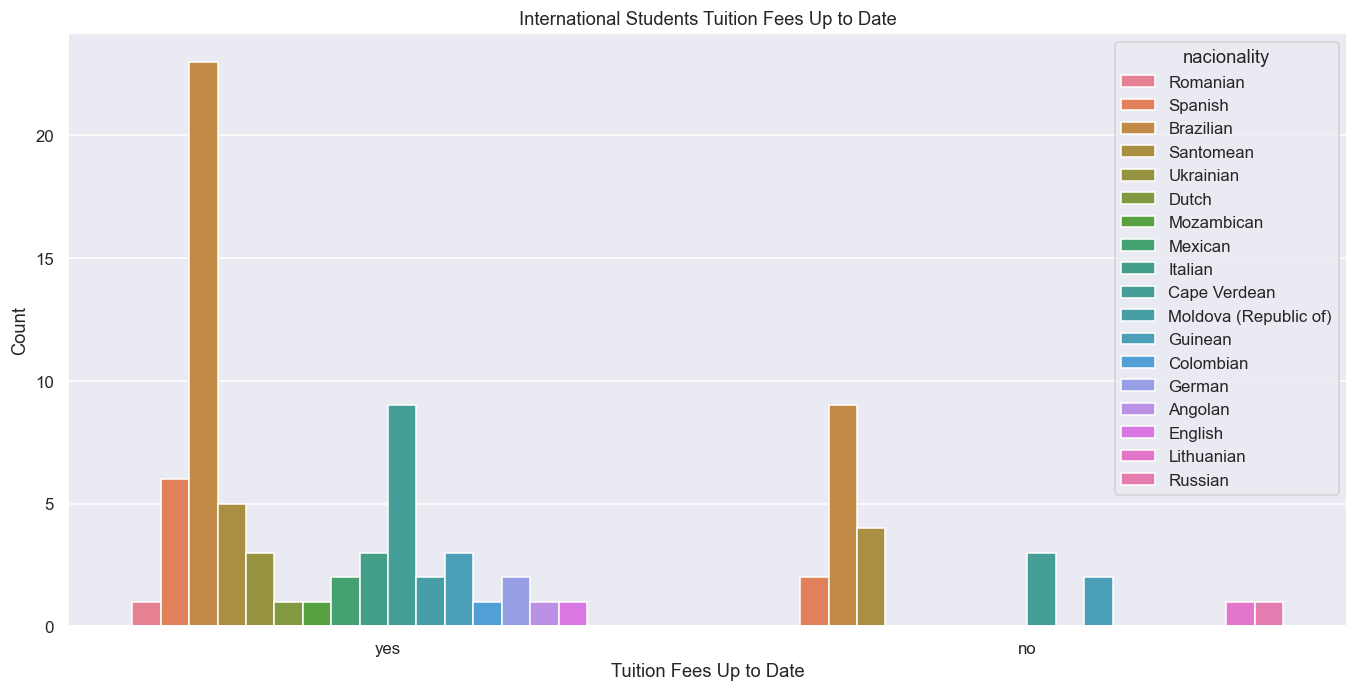

In [7420]:
#  Inspect which nationalities are up to date with tuition fees

internacional_students = data_copy.query('international == 1' )

plt.figure(figsize=(15,7))

ax = sns.countplot(x ='tuition_fees_up_to_date', hue = "nacionality", data = internacional_students)
ax.set_title('International Students Tuition Fees Up to Date')
ax.set_ylabel('Count')
ax.set_xlabel('Tuition Fees Up to Date')

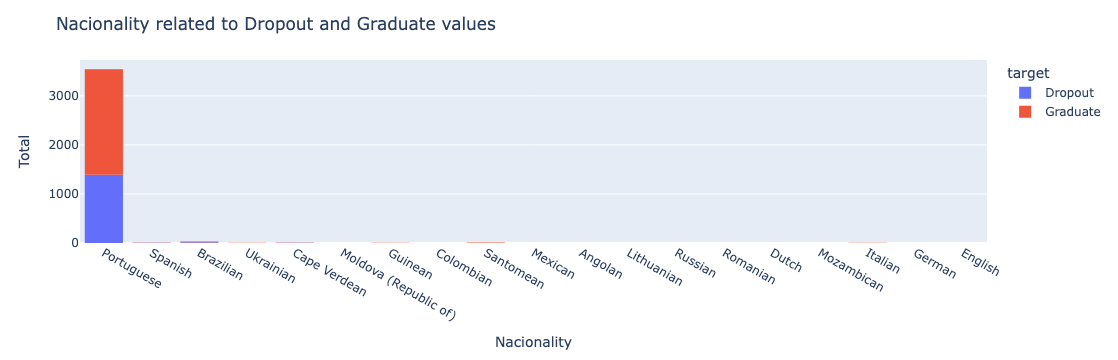

In [7421]:
# Nacionality related to target values

fig = px.histogram(data_copy, x='nacionality', color="target")
fig.update_layout(
        title="Nacionality related to Dropout and Graduate values",
        xaxis_title="Nacionality",
        yaxis_title="Total")
fig.show()

### Analyse relation beetween Gender and Unemployment rate

Text(0.5, 1.0, ' Unemployment rate frequency per Gender')

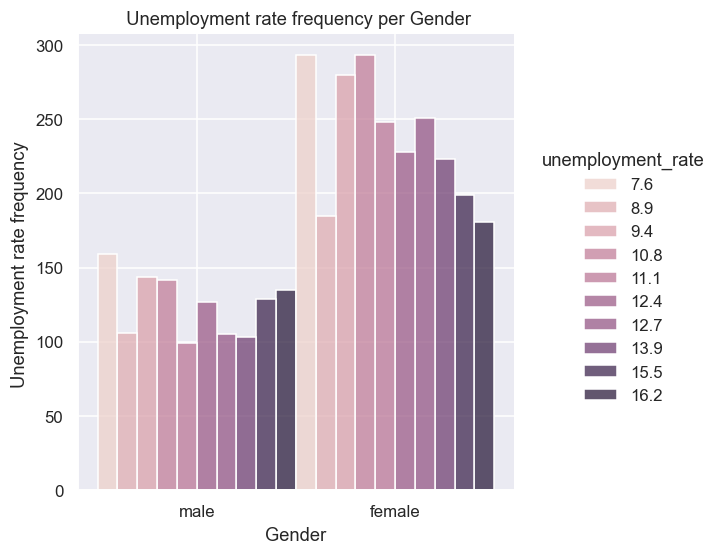

In [7422]:
# Compare Unemployment rate frequency related to Gender type

sns.displot(data_copy, x="gender", hue="unemployment_rate",multiple="dodge")

plt.xlabel("Gender")
plt.ylabel("Unemployment rate frequency ")
plt.title(" Unemployment rate frequency per Gender")

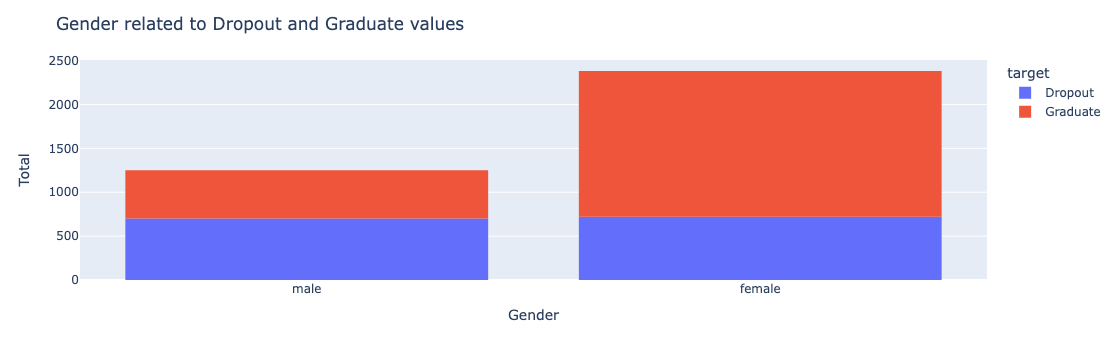

In [7423]:
# Relation beetween Gender and target values 

fig = px.histogram(data_copy, x="gender", color="target")
fig.update_layout(
        title="Gender related to Dropout and Graduate values",
        xaxis_title="Gender",
        yaxis_title="Total")
fig.show()

### Analyse feature courses

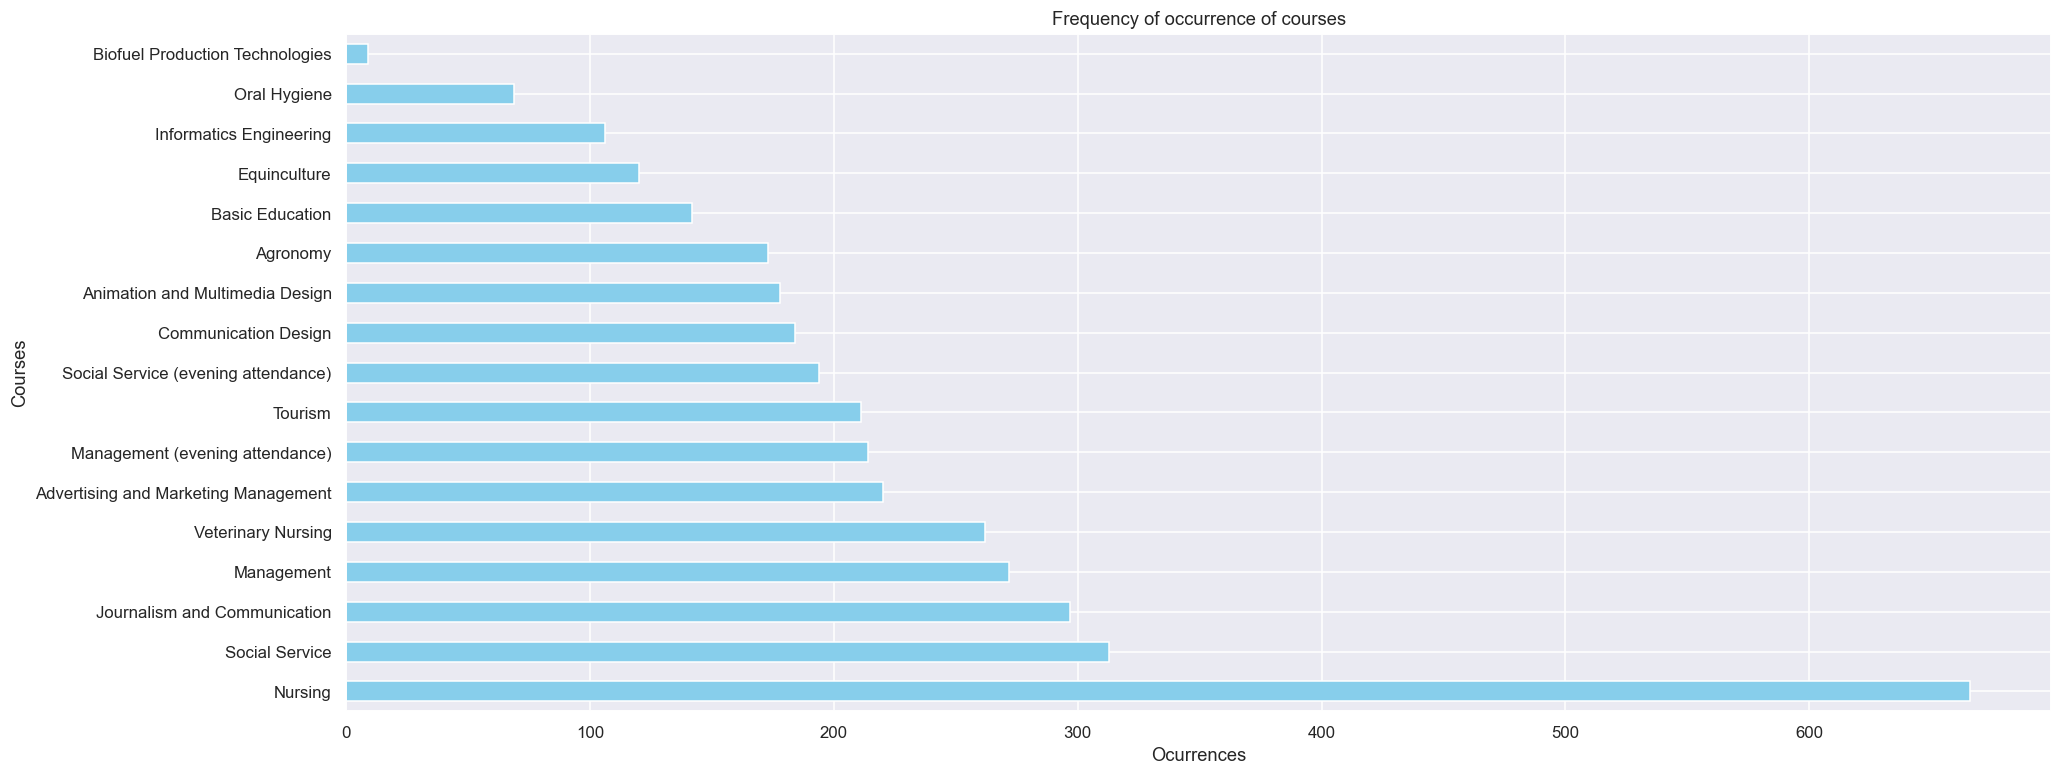

In [7424]:
# Verify the total occurences of students for each curse

course_value_counts = data_copy["course"].value_counts()

course_value_counts.plot(kind='barh', color='skyblue')

plt.title("Frequency of occurrence of courses")
plt.xlabel("Ocurrences")
plt.ylabel("Courses")
plt.show()

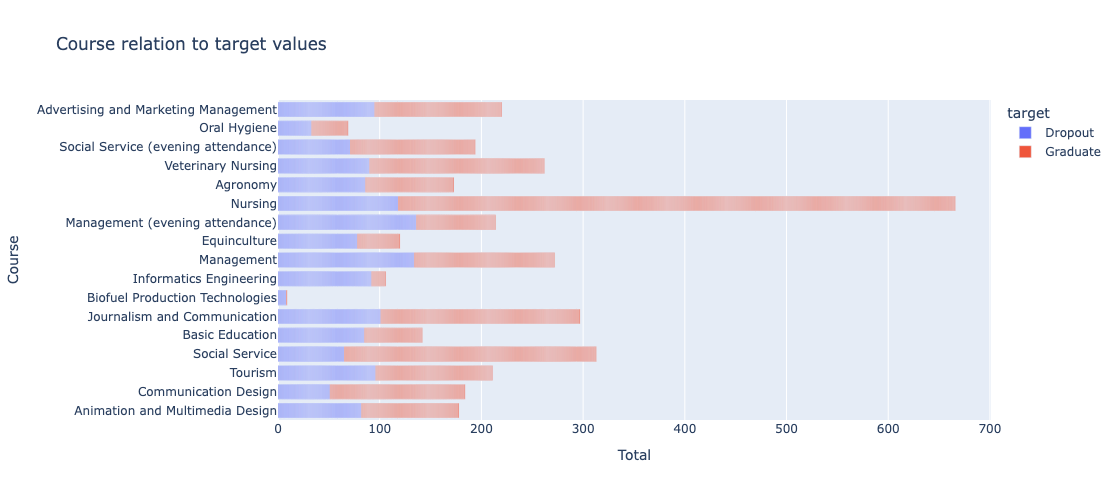

In [7425]:
# Relation between Courses and target Values

fig = px.bar(data_copy, y="course",color="target", orientation='h',
            height=500,
             title='Course relation to target values')
fig.update_layout(xaxis_title="Total",
            yaxis_title="Course")
fig.show()

### Outlier Inspection

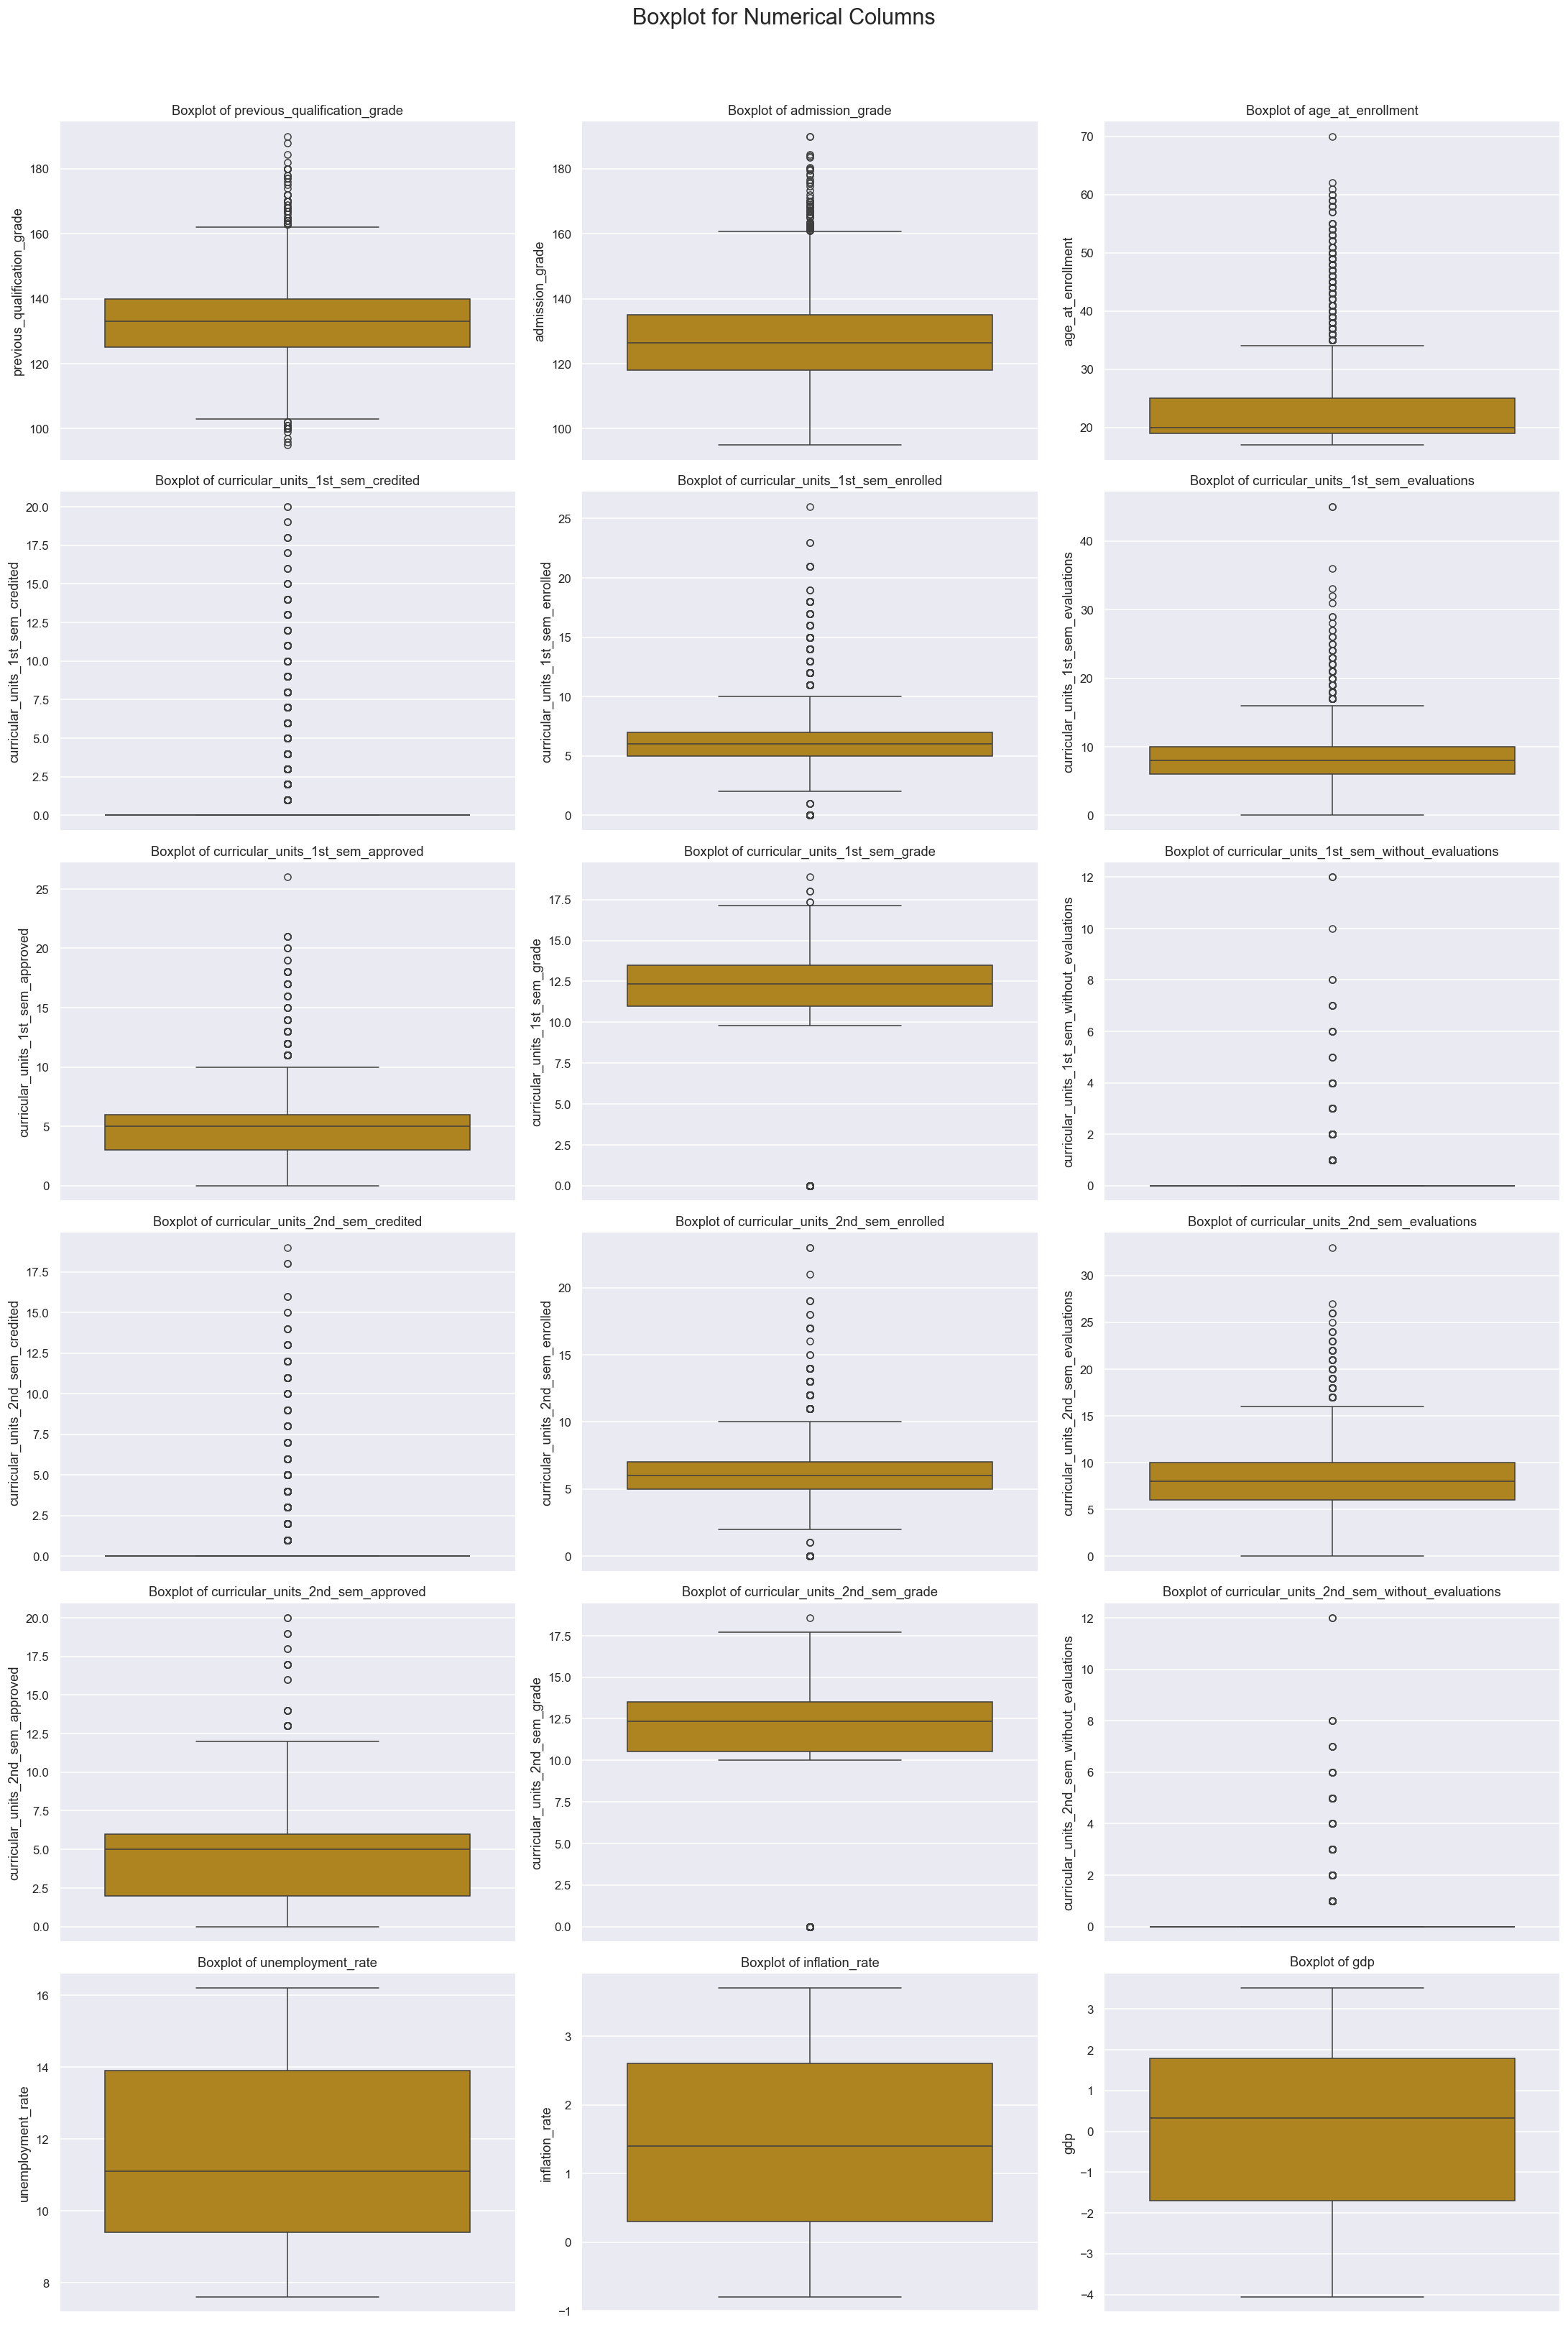

In [7426]:
"""
Visualize the outliers of numberical columns. 
"""

# Defining plot structure
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
fig.suptitle("Boxplot for Numerical Columns", fontsize=20)

# Flattening the axes
axes = axes.flatten()

# Loop through each numerical column
for i, col in enumerate(numerical_columns):
    # Boxplot using seaborn library
    sns.boxplot(y=df[col], ax=axes[i], color="#C58E0A")
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)


# Hiding the unused plots
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

# Adjusting the layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

 ===========> Description regarding outliers

In [7427]:
"""
Choosed Interquartile Range (IQR) method to remove the outliers from the dataset.
Here we are not removing the entire rows of outliers, we alter the values of outliers to the lower and upper limits.
"""

# Defining Q1, Q3 and IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Defining lower limit and upper limit
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Removing the outliers
df_no_outliers = df.copy()
for col in numerical_columns:
    df_no_outliers[col] = df[col].clip(
        lower=lower_limit[col], upper=upper_limit[col])

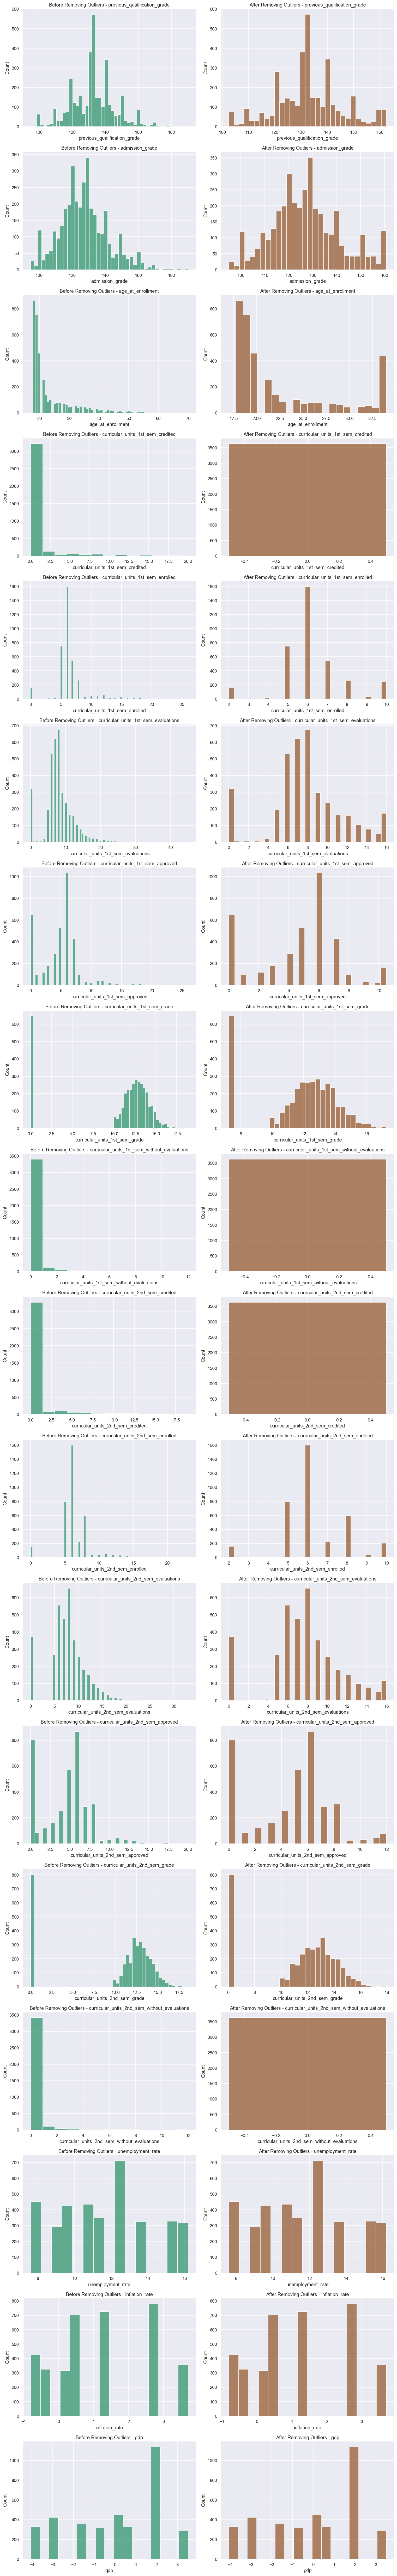

In [7428]:
"""
Comparing the distribution of numberical columns before and after the alternations of outliers using histograms.
"""

# Defining the plot structure
fig, axes = plt.subplots(len(numerical_columns), 2,
                         figsize=(14, 5 * len(numerical_columns)))


for i, col in enumerate(numerical_columns):
    # Before removing outliers
    sns.histplot(data=df, x=col, ax=axes[i, 0], color='#329670')
    axes[i, 0].set_title(f'Before Removing Outliers - {col}')

    # After removing outliers
    sns.histplot(data=df_no_outliers, x=col, ax=axes[i, 1], color='#965c32')
    axes[i, 1].set_title(f'After Removing Outliers - {col}')

# Adjust overlapping
plt.tight_layout()
plt.show()

In [7429]:
# Update df 

df = df_no_outliers

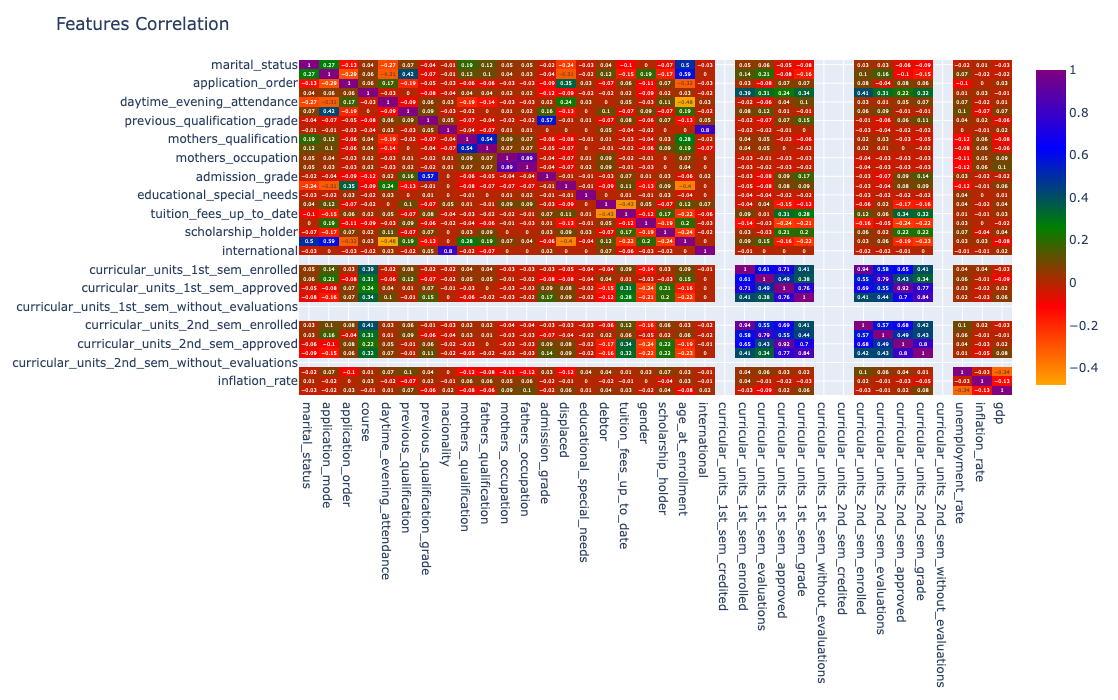

In [7430]:
# Heat map showing correlation of features

heat_map_correlation = px.imshow(df.drop('target', axis = 1).corr().round(2), text_auto=True, aspect="auto", color_continuous_scale=["orange", "red", 
                                         "green", "blue",
                                         "purple"])
heat_map_correlation.update_layout(title = 'Features Correlation',height=700, width=1000)
heat_map_correlation.show()

## Handling Correlation

In [7431]:
# Set a threshold
threshold = 0.7

# Select pairs with correlations above the threshold
high_corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(
    bool))  # Take only upper triangle to avoid duplication
high_corr_pairs = high_corr_pairs.stack().reset_index()  # Flatten the matrix
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold]

# Display highly correlated pairs
print(high_corr_pairs)

                                Feature 1  \
381     curricular_units_1st_sem_enrolled   
383     curricular_units_1st_sem_enrolled   
393  curricular_units_1st_sem_evaluations   
399     curricular_units_1st_sem_approved   
402     curricular_units_1st_sem_approved   
403     curricular_units_1st_sem_approved   
409        curricular_units_1st_sem_grade   
410        curricular_units_1st_sem_grade   
425     curricular_units_2nd_sem_approved   

                                Feature 2  Correlation  
381     curricular_units_1st_sem_approved     0.706953  
383     curricular_units_2nd_sem_enrolled     0.936048  
393  curricular_units_2nd_sem_evaluations     0.790999  
399        curricular_units_1st_sem_grade     0.762632  
402     curricular_units_2nd_sem_approved     0.917537  
403        curricular_units_2nd_sem_grade     0.774968  
409     curricular_units_2nd_sem_approved     0.703795  
410        curricular_units_2nd_sem_grade     0.839064  
425        curricular_units_2nd_sem_

In [7432]:
# Drop features with high correlation values

corr_columns = ["mothers_occupation","nacionality"]

df = df.drop(columns=corr_columns)

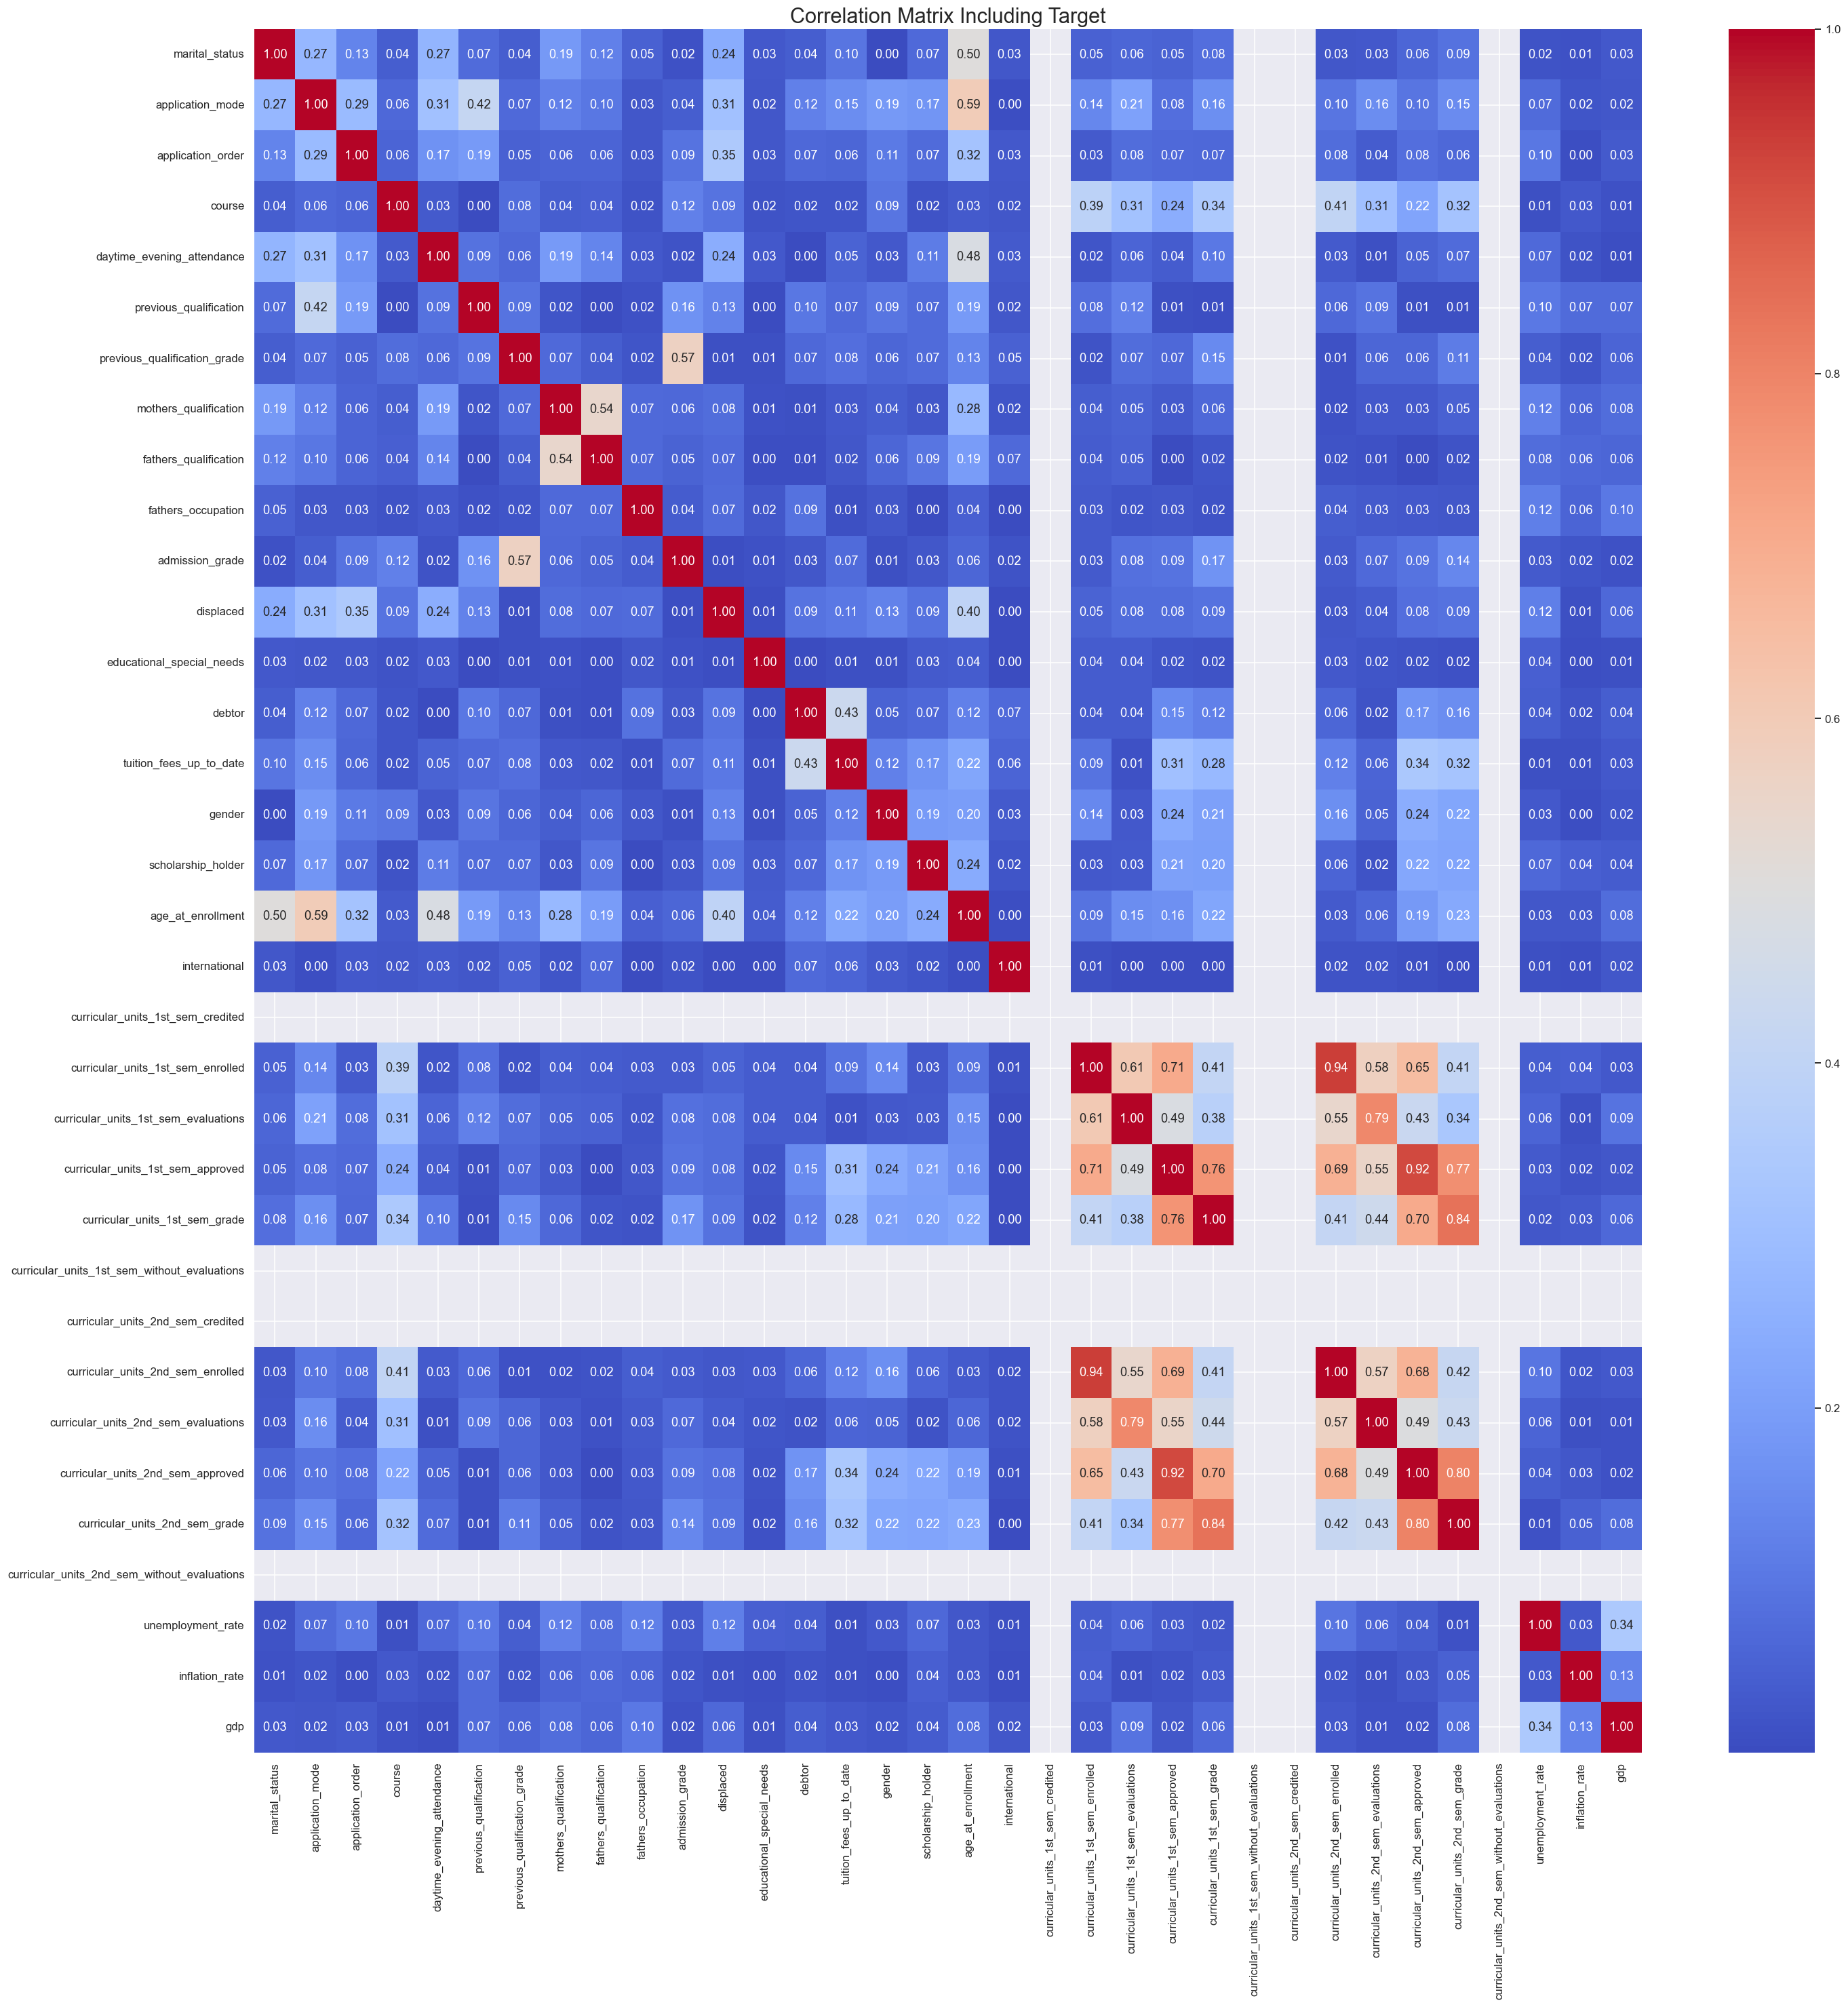

In [7433]:
# Correlation Matrix

correlation_matrix = df.drop('target',axis=1).corr().abs()
# Display the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Including Target", fontsize="20")
plt.show()

### Features treatment

In [7434]:
# Normalize features 

scaler =  StandardScaler()
X_features = scaler.fit_transform(df.drop('target',axis=1))
X_features

array([[-0.30068558, -0.08191671,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       [-0.30068558, -0.19714928, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       ...,
       [-0.30068558, -1.00377727, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727, -0.56247077, ..., -0.83619059,
        -1.46715379, -1.37663355],
       [-0.30068558, -0.4852307 , -0.56247077, ...,  0.4010228 ,
         1.78259971, -0.74822447]])

In [7435]:
# Encode target values

le = LabelEncoder()
df['target'] = le.fit_transform(df.target)
df['target'].unique()

array([0, 1])

In [7436]:
# Define X and y values

X = X_features
y = np.array(df['target'])


## Train Test Split

In [7437]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2904, 34)
(726, 34)
(2904,)
(726,)


# Decision Tree 

### Max Depth Error evaluation

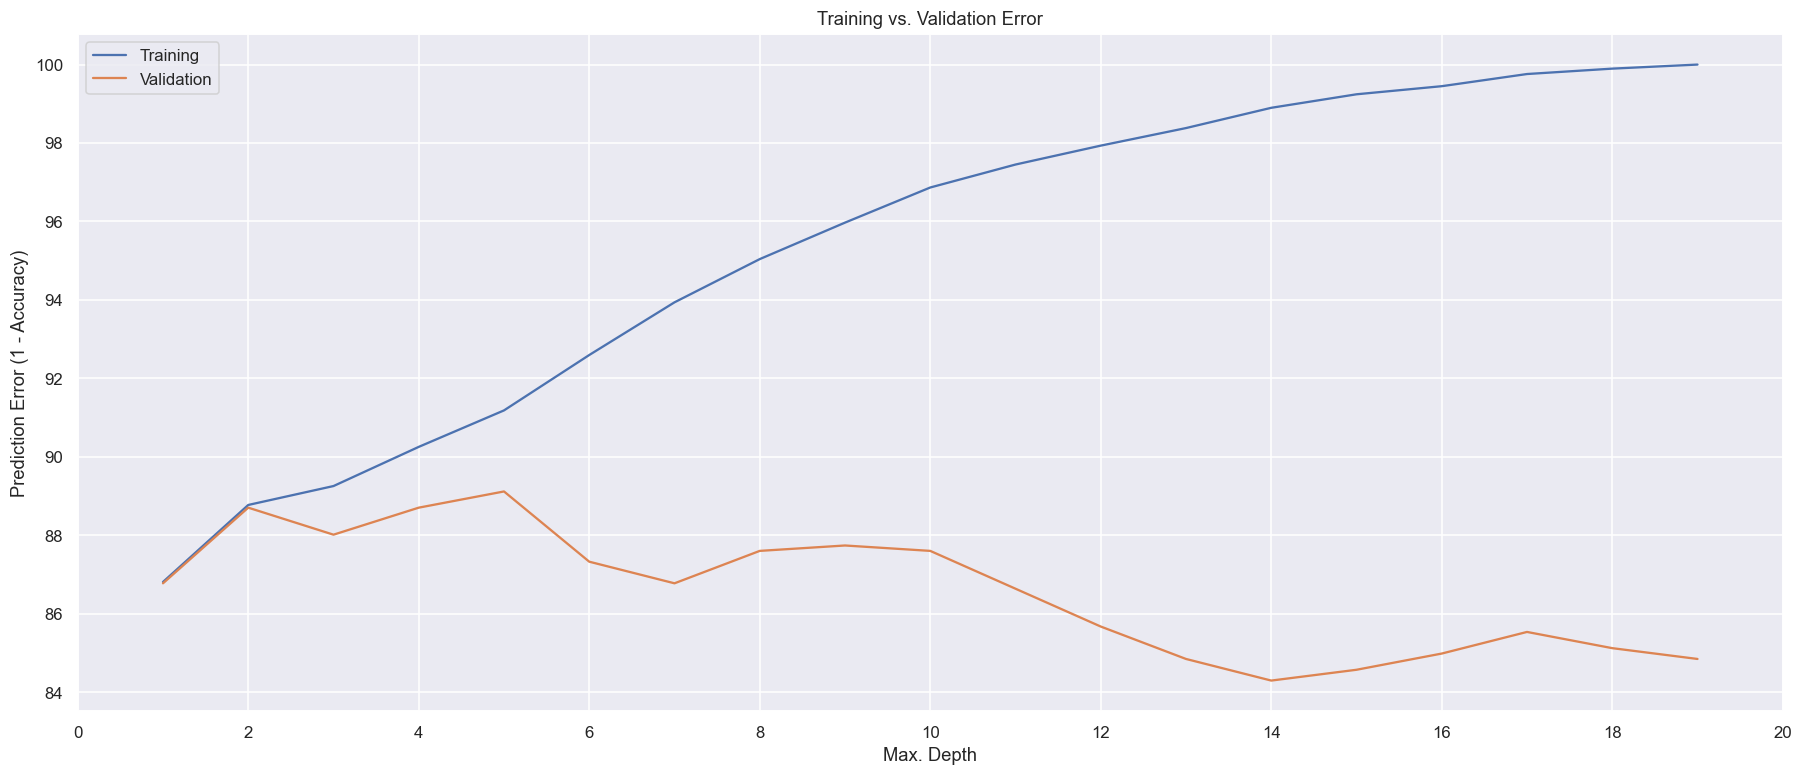

In [7438]:
def max_depth_error(max_depths):
    model = DecisionTreeClassifier(max_depth=max_depths, random_state=42)
    model.fit(X_train, y_train)
    training_accuracy = model.score(X_train, y_train)*100
    validation_accuracy = model.score(X_test, y_test)*100
    return {"Max Depth": max_depths, "Training Accuracy": training_accuracy, "Validation Accuracy": validation_accuracy}


max_depth_Df = pd.DataFrame([max_depth_error(md) for md in range(1, 20)])

plt.figure()
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Training Accuracy'])
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Validation Accuracy'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0, 21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [7439]:
DT_clf = DecisionTreeClassifier(max_depth=6) 

# Train Decision Tree Classifer
DT_clf = DT_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = DT_clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8746556473829201


### Hyperparameter Tuning with GridSearchCV

In [7440]:
model = DecisionTreeClassifier()

# Definition of parameters
param_grid = {
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [4,5,6,10],
    'criterion': ['gini', 'entropy']
}

g_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

g_search.fit(X_train, y_train)

print("Best Hyperparameters:", g_search.best_params_)
print("Best Accuracy (CV):", g_search.best_score_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 5}
Best Accuracy (CV): 0.8939355451362099


In [7441]:
# Model evaluation

DT_clf = DecisionTreeClassifier(max_depth=4,min_samples_split=4,criterion='entropy') 

DT_clf = DT_clf.fit(X_train, y_train)

y_pred = DT_clf.predict(X_test)

decison_tree_accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", decison_tree_accuracy)

Accuracy: 0.9008264462809917


In [7442]:
# Check predictions

for X,Y in zip(y_pred, y_test):
    print("Model:", X, "Actual:", Y)

Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 1 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 0
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 0 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 1 Act

## Randon Forest 

[0.8209366391184573, 0.8016528925619835, 0.8801652892561983, 0.8663911845730028, 0.8801652892561983, 0.8842975206611571, 0.8829201101928374, 0.8911845730027548, 0.8884297520661157, 0.8911845730027548, 0.8939393939393939, 0.8911845730027548, 0.8994490358126722, 0.9022038567493113, 0.8939393939393939, 0.9049586776859504, 0.8911845730027548, 0.8980716253443526, 0.9008264462809917, 0.8994490358126722, 0.9049586776859504, 0.8966942148760331, 0.9035812672176309, 0.8939393939393939, 0.8898071625344353, 0.8966942148760331, 0.9022038567493113, 0.9008264462809917, 0.90633608815427, 0.9008264462809917, 0.9035812672176309, 0.8966942148760331, 0.9035812672176309, 0.9022038567493113, 0.8966942148760331, 0.9008264462809917, 0.9022038567493113, 0.9022038567493113, 0.9008264462809917, 0.8994490358126722, 0.8980716253443526, 0.8994490358126722, 0.9035812672176309, 0.8994490358126722, 0.8966942148760331, 0.8925619834710744, 0.8953168044077136, 0.8966942148760331, 0.90633608815427, 0.9104683195592287, 0.9

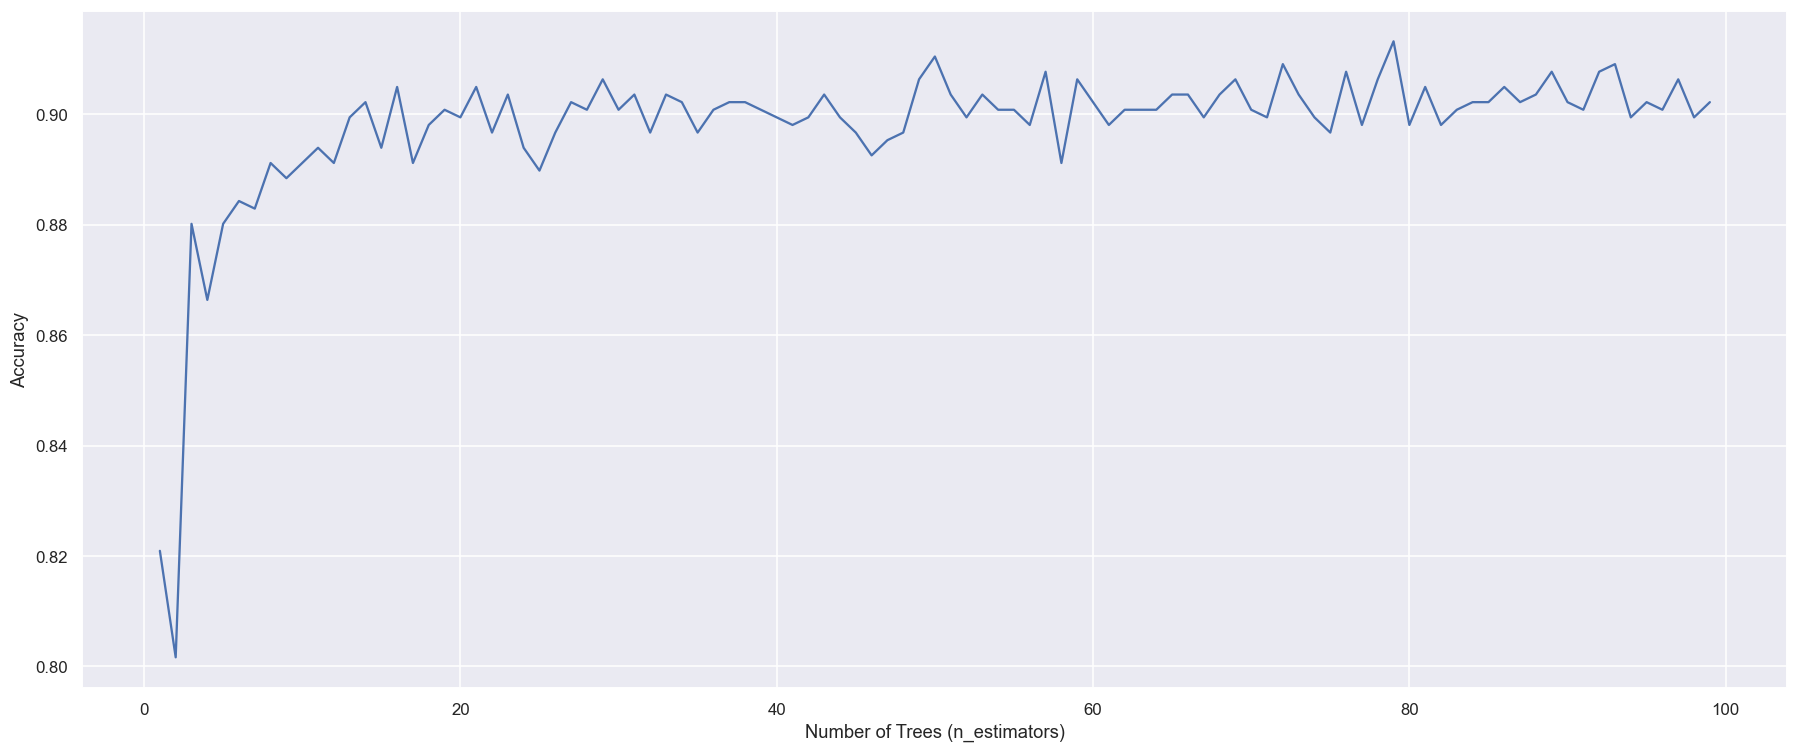

In [7443]:
#investigates the accuracy over a range of estimators

accuracy_data = []
nums = []
for i in range(1,100):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="entropy")
    rf_model.fit(X_train, y_train)
    y_model = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_model)
    accuracy_data.append(accuracy)
    nums.append(i)
    
print(accuracy_data)
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()

In [7444]:
# Randon Forest model and prediction applying estimators

rf_model = RandomForestClassifier(n_estimators=10)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(f'Random Forest Accuracy:', metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.8966942148760331


### Hyperparameter Tuning with RandomSearchCV

In [7445]:
param_grid = { 
    'n_estimators': [20,50,100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

random_forest_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid) 
random_forest_search.fit(X_train, y_train) 
print(random_forest_search.best_estimator_)
print("Best Accuracy (CV):",random_forest_search.best_score_)

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6)
Best Accuracy (CV): 0.8935919045640691


In [7446]:
# Model evaluation 

rf_model = RandomForestClassifier(max_depth=3, max_leaf_nodes=6, max_features=None)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(f'Random Forest Accuracy:', metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.8898071625344353


In [7447]:
# Check predictions

for X,Y in zip(y_pred, y_test):
    print("Model:", X, "Actual:", Y)

Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 1 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 0
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 0 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 0 Actual: 0
Model: 1 Actual: 1
Model: 1 Act

## SVM 

In [7448]:
svm = SVC(kernel='rbf', random_state=42)

# Training the model
svm.fit(X_train, y_train)

y_pred =  svm.predict(X_test)

svm_accuracy =  metrics.accuracy_score(y_test, y_pred)

print(f'SVM Accuracy:',svm_accuracy)

SVM Accuracy: 0.9118457300275482


### Hyperparameter tuning using XX

## Neural Network

## Classifiers Accuracy Comparison

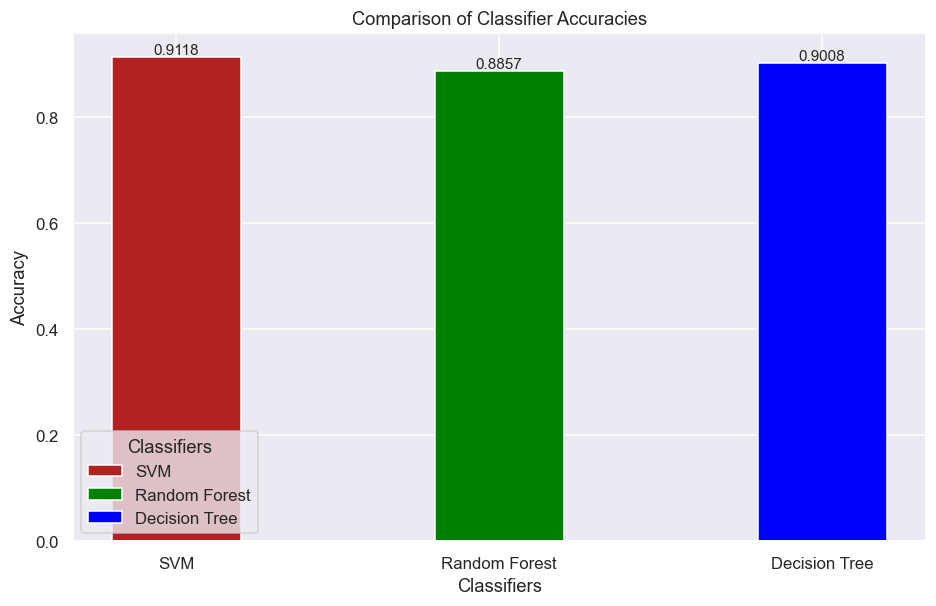

In [7449]:
evaluation = ['SVM', 'Random Forest', 'Decision Tree']
accuracys = [svm_accuracy, random_forest_accuracy, decison_tree_accuracy]

colors = ['firebrick', 'green', 'blue']

plt.figure(figsize=(10, 6))

bar_width = 0.4

bars = plt.bar(evaluation, accuracys, color=colors, width=bar_width)

plt.xlabel('Classifiers')
plt.ylabel("Accuracy")
plt.title('Comparison of Classifier Accuracies')

plt.legend(bars, evaluation, title="Classifiers")

# Display the value of each bar on top with 4 decimal places
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.show()

## Features Importance Comparison

In [7450]:
'''print(DT_clf_importances_feature)'''

'print(DT_clf_importances_feature)'

In [7451]:
'''"""
Getting the important features from trained decision tree model. 
"""

DT_clf_importances_feature = DT_clf.feature_importances_'''

'"""\nGetting the important features from trained decision tree model. \n"""\n\nDT_clf_importances_feature = DT_clf.feature_importances_'

In [7452]:
''''plt.barh(X.columns, DT_clf_importances_feature)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()'''

"'plt.barh(X.columns, DT_clf_importances_feature)\nplt.title('Feature Importance')\nplt.xlabel('Feature')\nplt.ylabel('Importance')\nplt.xticks(rotation=45)\nplt.show()"